# Projeto Titanic

    Este projeto faz parte do curso de Fundamentos de Data Science I, ministrado pela Udacity, e é pré-requisito para a obtenção do diploma no mesmo. 
    De acordo com a Wikipédia: "O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente inafundável.
    Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história."    
    No projeto utilizaremos um dataset, conjunto de dados, que contém informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic. Dados estes que mostram se o tripulante sobreviveu ou não ao desastre, qual era a classe em que viajava, idade, sexo entre outros.
    Para realizar a análise dos dados em questão utilizaremos o notebook Jupyter com Python 3 e suas bibliotecas Pandas e NumPy.

In [1]:
import pandas as pd

ds_titanic = pd.read_csv("titanic-data.csv")
ds_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


    Com a importação do arquivo e a visualização de algumas linhas ja surgem duvidas sobre os dados mostrados. Consultando a fonte de onde foram extraídos, conseguimos seus significados:
    +Survived = Se sobreviveu ou não. (0 = N e 1 = S);
    +Pclass = Classe do tiquete. (1 = Primeira, 2 = Segunda e 3 = Terceira);
    +SibSp = Número de irmãos / cônjuges a bordo do Titanic;
    +Parch = Número de pais / filhos a bordo do Titanic;
    +Fare = Tarifa;
    +Embarked = Porto de Embarcação. (C = Cherbourg, Q = Queenstown, S = Southampton)
    
    De posse dessas informações, algumas hipóteses podem ser levantadas de como certas variáveis poderiam interferir na chance de sobrevivência do indivíduo. Nesse estudo levantamos 3 hipóteses mas várias outras poderiam ser analisadas.

# Hipóteses
    
    1 - A classe em que o indivíduo viajava poderia ser fator determinate para sua sobrevivência?
    2 - O vínculo familiar seria capaz de influenciar, de alguma maneira, pela busca de sobrevivência?
    3 - A idade do indivíduo teria algum impacto em suas chances de sobrevivência?

    Estas serão as hipóteses investigadas nesta análise. E para o primerio momento, faremos um levantamento dos dados para verificar a necessidade de limpeza dos mesmos.
    

In [5]:
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Análise
    
    Utilizando o .info() de Pandas verificamos que os dados sobre a cabine são problemáticos por apresentarem grande quantidade de valores nulos, mas como nossa análise não leva isso em consideração poderemos excluir essa coluna.
    Verificamos também que a coluna com os dados de onde os passageiros embarcaram também possui valores nulos, coluna que será excluída da análise pelo mesmo motivo da exclusão da coluna de Cabin.
    No entanto, a coluna de Idade (Age) deverá ser tratada pois é objeto de estudo.


In [2]:
ds_titanic.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


    O tratamento da coluna Idade será realizado quando formos analisar a terceira hipótese pois pode afetar o resultado das duas primeiras. Seguindo com o processo de limpeza de dados verificaremos se o dataSet possui dados duplicados e, se possuir, avaliar qual a melhor solução.

In [3]:
sum(ds_titanic.duplicated())

0

    Tirando os valores nulos da coluna de idade, que serão tratados quando formos analisar a terceira hipótese, os valores do dataSet estão prontos para a análise. 
    Vamos agora verificar se a classe em que viajavam teve papel de distaque para a sobrevivência nesse desastre.

In [3]:
#Utilizando matplotlib
% matplotlib inline


In [6]:
#Obtendo a quantidade de pessoas por classe
totalPorClasse = agrupaPorColuna('Pclass')

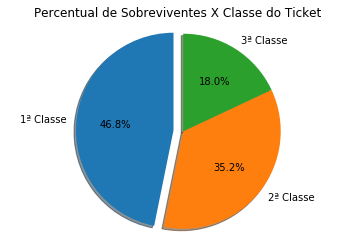

In [7]:
#Obtendo a quantidade de sobreviventes por classe de tickets
sobreviventesPorClasse = totalSobreviventesAgrupados('Pclass')

primeiraClasseProporcao = buscaPercentual(sobreviventesPorClasse[1], totalPorClasse[1])
segundaClasseProporcao = buscaPercentual(sobreviventesPorClasse[2], totalPorClasse[2])
terceiraClasseProporcao = buscaPercentual(sobreviventesPorClasse[3], totalPorClasse[3])

#script para construção do grafico obtido em https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html e 
#apenas alterado para o exercicio
import matplotlib.pyplot as plt

labels = '1ª Classe', '2ª Classe', '3ª Classe'
sizes = [primeiraClasseProporcao, segundaClasseProporcao, terceiraClasseProporcao]
explode = (0.1, 0, 0) 
titulo = 'Percentual de Sobreviventes X Classe do Ticket'

plotaGraficoPizza(plt, sizes, explode, labels, titulo)


    Os resultados obtidos com a análise sobre a classe do ticket permitem afirmar que os passageiros que viajavam na 1ª classe possuiam 46.8%, os de 2ª classe possuiam 35.2% e os de 3ª classe 18% de sobreviverem ao desastre. Esses dados evidenciam que a classe em que os passageiros viajavam lhes ofereceu maior ou menor chance de sobrevivência no desastre.
    
    Para a 2ª hipótese aventada teremos que averiguar mais detalhadamente as colunas 'SibSp' e 'Parch'

In [65]:
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [39]:
#Total de pessoas com irmao e conjuges ja separados por quantidade
totalPorNumIrmaoConjuges = agrupaPorColuna('SibSp')

#total de pessoas que sobreviveram e que possuiam irmao ou conjuges no Titanic
totalSobreviventesPorNumIrmaoConjuges = totalSobreviventesAgrupados('SibSp')


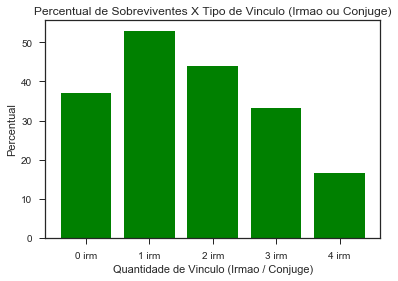

In [40]:
#Como nao tem sobreviventes com 5 e 8 eles não vao entrar no grafico
semIrmao = buscaPercentual(totalSobreviventesPorNumIrmaoConjuges[0], totalPorNumIrmaoConjuges[0])
umIrmao = buscaPercentual(totalSobreviventesPorNumIrmaoConjuges[1], totalPorNumIrmaoConjuges[1])
doisIrmao = buscaPercentual(totalSobreviventesPorNumIrmaoConjuges[2], totalPorNumIrmaoConjuges[2])
tresIrmao = buscaPercentual(totalSobreviventesPorNumIrmaoConjuges[3], totalPorNumIrmaoConjuges[3])
quatroIrmao = buscaPercentual(totalSobreviventesPorNumIrmaoConjuges[4], totalPorNumIrmaoConjuges[4])

labels = '0 irm', '1 irm', '2 irm', '3 irm', '4 irm'
sizes = [semIrmao, umIrmao, doisIrmao, tresIrmao, quatroIrmao]
explode = (0.2, 0, 0.1, 0, 0) 
titulo = 'Percentual de Sobreviventes X Tipo de Vinculo (Irmao ou Conjuge)'
yTitulo = 'Percentual'
xTitulo = 'Quantidade de Vinculo (Irmao / Conjuge)'

plotaGraficoBarras(sizes, labels, plt, titulo, yTitulo, xTitulo)


    O vínculo familiar entre irmãos ou conjuges, pela análise realizada, demonstra que esse tipo de vínculo influenciou na busca dos indivíduos pela sobrevivência. Pode-se verificar que o percentual de sobreviventes entre aqueles que possuíam 1 (irmão ou conjuge) ou 2 (irmao ou conjuge) é até maior do que aqueles que não possuíam vínculo algum, influenciando assim positivamente. Já aqueles percentuais de quem possuía 3 ou 4 são menores e os com 5 ou 8 nem sobreviveram, influenciando portanto, negativamente os individuos.

In [37]:
#Total de pessoas com irmao e conjuges ja separados por quantidade
totalPorNumPaisFilhos = agrupaPorColuna('Parch')

#total de pessoas que sobreviveram e que possuiam irmao ou conjuges no Titanic
totalSobreviventesPorNumPaisFilhos = totalSobreviventesAgrupados('Parch')


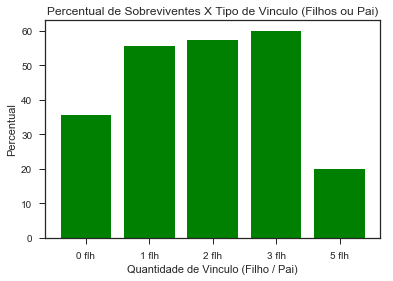

In [38]:
#Como nao tem sobreviventes com 4 e 6 eles não vao entrar no grafico
semPaisFilhos = buscaPercentual(totalSobreviventesPorNumPaisFilhos[0], totalPorNumPaisFilhos[0])
umPaisOuFilhos = buscaPercentual(totalSobreviventesPorNumPaisFilhos[1], totalPorNumPaisFilhos[1])
doisPaisOuFilhos = buscaPercentual(totalSobreviventesPorNumPaisFilhos[2], totalPorNumPaisFilhos[2])
tresPaisOuFilhos = buscaPercentual(totalSobreviventesPorNumPaisFilhos[3], totalPorNumPaisFilhos[3])
cincoPaisOuFilhos = buscaPercentual(totalSobreviventesPorNumPaisFilhos[5], totalPorNumPaisFilhos[5])

labels = '0 flh', '1 flh', '2 flh', '3 flh', '5 flh'
sizes = [semPaisFilhos, umPaisOuFilhos, doisPaisOuFilhos, tresPaisOuFilhos, cincoPaisOuFilhos]
explode = (0.2, 0, 0, 0, 0) 
titulo = 'Percentual de Sobreviventes X Tipo de Vinculo (Filhos ou Pai)'
yTitulo = 'Percentual'
xTitulo = 'Quantidade de Vinculo (Filho / Pai)'

plotaGraficoBarras(sizes, labels, plt, titulo, yTitulo, xTitulo)

    Já o vínculo familiar entre pais e filhos parece ser um pouco mais forte pois demonstra que o percentual de sobreviventes entre aqueles que possuíam 1, 2 ou 3 (Pais / Filhos) é maior do que aqueles que não possuíam vínculo algum, influenciando fortemente para positivo. Contudo, visualizamos mais uma vez que aqueles indivíduos que possuíam familia um pouco maior foram prejudicados por esse vinculo.
    Como demonstrado nos graficos acima, conseguimos identificar uma resposta clara para a segunda hipótese: a de que o vinculo familiar influencia sim, positiva ou negativamente, o individuo na busca pela sobrevivencia.
    

    Para realizar a análise para a terceira hipótese deveremos fazer a limpeza daqueles dados nulos que estavam na amostra pois podem interferir nos resultados.

In [125]:
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [12]:
#Para excluir as linhas com valores nulos
ds_titanic.dropna(inplace=True)

In [127]:
# verificando se o dataSet possui qualquer valor nulo
ds_titanic.isnull().sum().any()

False

In [128]:
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 61.4+ KB


    Agora que o dataSet foi sanitizado poderemos continuar com a análise para a terceira hipotese.

In [135]:
#Para verificar os intervalos que poderao ser utilizados
ds_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
# Bordas dos intervalos que serão usados para dividir os dados em grupos
bin_edges = [0, 20.12, 60, 81]

# Rótulos para os quadro grupos de idade
bin_names = [ 'Jovens', 'Adultos', 'Velhos']

ds_titanic['intervalo_idade'] = pd.cut(ds_titanic['Age'], bin_edges, labels=bin_names, include_lowest=True)

In [21]:
ds_titanic.query("intervalo_idade == 'Adultos'")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,intervalo_idade
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Adultos
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Adultos
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Adultos
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Adultos
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Adultos
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,Adultos
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Adultos
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,Adultos
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,Adultos
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,Adultos


Text(0,0.5,'Quantiadade')

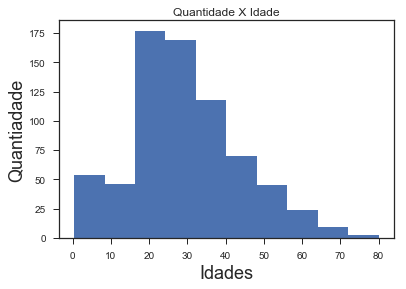

In [34]:
ds_titanic['Age'].plot(kind='hist', title='Quantidade X Idade')
plt.xlabel('Idades', fontsize=18)
plt.ylabel('Quantiadade', fontsize=18)

    O gráfico acima demonstra que a quantidade de indivíduos agrupados como 'Adultos' é a maior do universo escolhido, portanto faz-se necessário cálculos para corrigir essa distorção. 

In [35]:
#Total de pessoas com por idade
totalPorIdade = agrupaPorColuna('intervalo_idade')

#total de pessoas que sobreviveram e que possuiam irmao ou conjuges no Titanic
totalSobreviventesPorIdade = totalSobreviventesAgrupados('intervalo_idade')

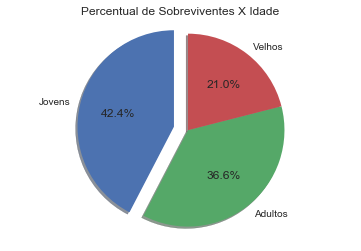

In [36]:
jovens = buscaPercentual(totalSobreviventesPorIdade["Jovens"], totalPorIdade["Jovens"])
adultos = buscaPercentual(totalSobreviventesPorIdade["Adultos"], totalPorIdade["Adultos"])
velhos = buscaPercentual(totalSobreviventesPorIdade["Velhos"], totalPorIdade["Velhos"])

labels = 'Jovens', 'Adultos', 'Velhos'
sizes = [jovens, adultos, velhos]
explode = (0.15, 0, 0) 
titulo = 'Percentual de Sobreviventes X Idade'

plotaGraficoPizza(plt, sizes, explode, labels, titulo)

        Para a hipótese 3 os dados foram subdivididos em intervalos menores para facilitar a analise, ficando assim agrupados:
    
    +Jovens -> 0|-20.12;
    +Adultos -> 20.13 |- 60;
    +Velhos -> 60.01 |- 81;
    
    E após os calculos podemos verificar que aqueles que ficaram classificados como "Jovens" foram os que mais sobreviveram nesse desastre.

In [5]:
#Funcao utilizada para retornar os valores agrupados pela coluna informada.
def agrupaPorColuna(coluna):
    return ds_titanic.groupby([coluna]).count()['PassengerId']

#Funcao utilizada para retornar os valores de sobreviventes pela coluna informada.
def totalSobreviventesAgrupados(coluna):
    return ds_titanic.query("Survived == 1").groupby([coluna]).count()['PassengerId']

#Funcao utilizada para realizar o calculo de percentual
def buscaPercentual(valor1, valor2):
    return (valor1 / valor2) * 100

#Funcao utilizada para plotar os graficos de pizza com os valores repassados
def plotaGraficoPizza(plt, sizes, explode, labels, titulo):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal') 
    
    plt.title(titulo)
    plt.show()
    
#script para grafico de barras encontrado em https://www.vooo.pro/insights/guia-basico-para-plotar-graficos-usando-o-matplotlib-do-python-parte-2/
#Funcao utilizada para plotar graficos de Barras com os valores repassados.
def plotaGraficoBarras(sizes, labels, plt, titulo, yTitulo, xTitulo):
   
    yBar = sizes
    z = [i * 1.5 for i in yBar]
    xBar = labels
    
    plt.title(titulo)
    plt.ylabel(yTitulo)
    plt.xlabel(xTitulo)
    
    plt.bar(xBar, yBar, color="green")


    
# Conclusão

    Com isso encerramos este estudo e conseguimos averiguar todas as hipóteses levantadas. Que a classe do ticket influenciou  devido à localização das cabines; que os vínculos familiares influenciaram positivamente ou negativamente nas chances de sobrevivência dos indivíduos; e que, por fim, aqueles indivíduos mais jovens tiveram maiores taxas de sobrevivência até por conta de sua própria estrutura fisica.
    
# Limitações

    Para a análise em questão alguns pontos limitaram a abrangência do estudo, como por exemplo a quantidade de registros disponibilizados, ja que, o seu universo é bem maior. A grande quantidade de itens nulos para a coluna de Cabin foi outro limitador agravante pois prejudicou o estudo da plotagem das mesmas no navio, que poderia aventar outra hipótese para o desastre.
    
# Finalização
    
    Perante todos esses estudos fica comprovada a facilidade de se executar análise de dados em dataSets, dos mais diversos tipos de dados, de uma maneira rápida e confiável.